,Country Code,Region,IncomeGroup,SpecialNotes,TableName
0,ABW,Latin America & Caribbean,High income,NaN,Aruba
1,AFE,NaN,NaN,"26 countries, stretching from the Red Sea in t...",Africa Eastern and Southern
2,AFG,South Asia,Low income,The reporting period for national accounts dat...,Afghanistan
3,AFW,NaN,NaN,"22 countries, stretching from the westernmost ...",Africa Western and Central
4,AGO,Sub-Saharan Africa,Lower middle income,The World Bank systematically assesses the app...,Angola


(265, 5)

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."


(255, 4)

200


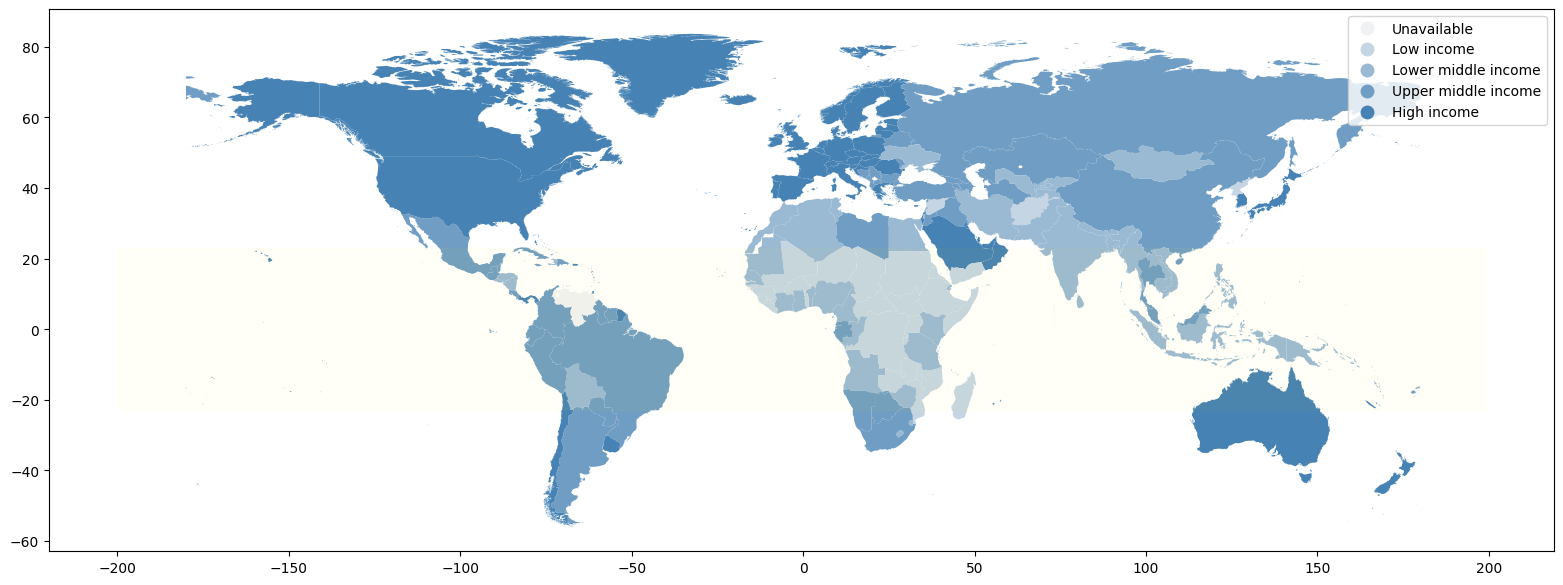

In [3]:


import seaborn as sns
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.pyplot as plt
import json
import requests
import numpy as np
import pandas as pd
import os
import geopandas as gpd
from IPython.display import display
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


countries_data = pd.read_csv('Metadata_Country_API_NY.GDP.MKTP.KD.ZG_DS2_en_csv_v2_4701072.csv').iloc[:,:-1]
display(countries_data.head(),countries_data.shape)

countries_data.isna().sum()
countries_data['IncomeGroup'] = countries_data.IncomeGroup.fillna('Unavailable')

data_url = 'https://raw.githubusercontent.com/datasets/geo-countries/master/data/countries.geojson'
response = requests.get(data_url)

geo_data = gpd.read_file(data_url)
display(geo_data.head(),geo_data.shape)

geo_data.isna().sum()
print(response.status_code)
income_order = {'High income': 4, 'Upper middle income': 3,
                'Lower middle income': 2, 'Low income': 1, 'Unavailable': 0}
countries_data['Incomeint'] = countries_data.IncomeGroup
# force to convert data type to Int, needed to make legend later
countries_data['Incomeint'] = countries_data.Incomeint.replace(
    income_order).astype('Int64')

# merge the two dataframes, default is inner. We need to be able to paint most of the map.
merged = geo_data.merge(countries_data, left_on='ISO_A3', right_on='Country Code')
merged.head()

palette = sns.light_palette('steelblue', as_cmap=True)
fig, ax = plt.subplots(1, 1, figsize=(20, 20))
divider = make_axes_locatable(ax)
merged.plot(column='Incomeint', cmap=palette,
 categorical=True, legend=True, ax=ax)
ax = plt.gca()

plt.fill_between(x=np.arange(-200, 200), y1=-23,
                 y2=23, alpha=0.03, color='yellow')


def replace_legend_items(legend, mapping):
    for txt in legend.texts:
        for k, v in mapping.items():
            if txt.get_text() == str(k):
                txt.set_text(v)


legend_order = {4: 'High income', 3: 'Upper middle income',
                2: 'Lower middle income', 1: 'Low income', 0:  'Unavailable'}
replace_legend_items(ax.get_legend(), legend_order)
plt.show()
